# Predicting Customer Churn for a Bank using Random Forests and Sci-kit Learn
<h3><span style="color: #117d30;"> Predicting whether a retail banking customer is likely to churn</span></h3>


## Disclaimer

By accessing this code, you acknowledge the code is made available for presentation and demonstration purposes only and that the code (1) is not subject to SOC 1 and SOC 2 compliance audits, and (2) is not designed or intended to be a substitute for the professional advice, diagnosis, treatment, or judgment of a certified financial services professional. Do not use this code to replace, substitute, or provide professional financial advice, or judgement. You are solely responsible for ensuring the regulatory, legal, and/or contractual compliance of any use of the code, including obtaining any authorizations or consents, and any solution you choose to build that incorporates this code in whole or in part.

© 2021 Microsoft Corporation. All rights reserved

### Introduction

In this example we use historical retail banking data to build a Random Forest model to predict whether a retail banking customer is likely to churn or not. The end objective is to predict **Churn Ratio** for the retail banking business, which is defined as the proportion of all retail banking customers that are likely to churn, in near future.  

In [6]:
# Importing the required packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import yellowbrick

In [7]:
!pip install yellowbrick

In [8]:
import GlobalVariables 


In [12]:
data = pd.read_csv('retail_banking_customer_churn_for_model.csv')
show = data.head(5)
show.style

,age,marital,housing,loan,contact,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_professional.course,education_university.degree,poutcome_failure,poutcome_nonexistent,poutcome_success,job_admin.,job_blue-collar,job_entrepreneur,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,1,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,57,1,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,37,1,2,1,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,40,1,1,1,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,56,1,1,2,1,999,0,1.1,93.994,-36.4,4.857,5191,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [23]:
data = data.rename (columns={'y': 'churn'})

In [24]:
# Data For cross validation and GridSearch
Y = data['churn']
X = data.drop(['churn'], axis=1)
print ('Training Data Shape', X.shape)
print ('Testing Data Shape', Y.shape)

Training Data Shape (41188, 31)
Testing Data Shape (41188,)


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 31 columns):
age                              41188 non-null int64
marital                          41188 non-null int64
housing                          41188 non-null int64
loan                             41188 non-null int64
contact                          41188 non-null int64
pdays                            41188 non-null int64
previous                         41188 non-null int64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
education_basic.4y               41188 non-null int64
education_basic.6y               41188 non-null int64
education_basic.9y               41188 non-null int64
education_high.school            41188 non-null int64
education_profess

In [26]:
# Create random forest object
RF = RandomForestClassifier()
n_estimators = [18,22]
criterion = ['gini', 'entropy']
# Create a list of all of the parameters

X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y, test_size = 0.2)


max_depth = [30,40,50]
min_samples_split = [6,8]
min_samples_leaf = [8,10,12]
# Merge the list into the variable
hyperparameters = dict(n_estimators = n_estimators,max_depth=max_depth, criterion=criterion,min_samples_leaf = min_samples_leaf ,min_samples_split = min_samples_split)
# Fit your model using gridsearch
model = GridSearchCV(RF, hyperparameters, cv=5, verbose=0)
best_model = model.fit(X, Y)


print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (32950, 31)
Number transactions y_train dataset:  (32950,)
Number transactions X_test dataset:  (8238, 31)
Number transactions y_test dataset:  (8238,)


In [27]:
# Mean cross validated score
print('Mean Cross-Validated Score: ',best_model.best_score_)
print('Best Parameters',best_model.best_params_)
# You can also print the best penalty and C value individually from best_model.best_estimator_.get_params()
print('Best criteria:', best_model.best_estimator_.get_params()['criterion'])
print('Best depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best estimator:', best_model.best_estimator_.get_params()['n_estimators'])

Mean Cross-Validated Score:  0.4649744196590665
Best Parameters {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 12, 'min_samples_split': 6, 'n_estimators': 22}
Best criteria: entropy
Best depth: 50
Best estimator: 22


In [28]:
rf = RandomForestClassifier(n_estimators=100, max_depth=20)
rf.fit(X_train, y_train) 
score = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.958
Test set accuracy:  0.892


In [29]:
kfold = KFold(n_splits = 3)
model = RandomForestClassifier(max_depth=40, criterion='gini',min_samples_leaf = 12 ,min_samples_split = 8, n_estimators = 22)
model = model.fit(X_train, y_train)
results = model_selection.cross_val_score(model,X,Y,cv = kfold)
print(results)
print('Accuracy',results.mean()*100)

[0.96256373 0.94056377 0.75890451]
Accuracy 88.73440026287648


In [30]:
model_predictions = model.predict(X_test)
model_probs = model.predict_proba(X_test)



In [31]:
print (model_predictions)
print(model_probs)

[0 0 0 ... 0 0 0]
[[0.96957956 0.03042044]
 [0.89727429 0.10272571]
 [0.9606399  0.0393601 ]
 ...
 [0.90860748 0.09139252]
 [0.98062679 0.01937321]
 [0.96390355 0.03609645]]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


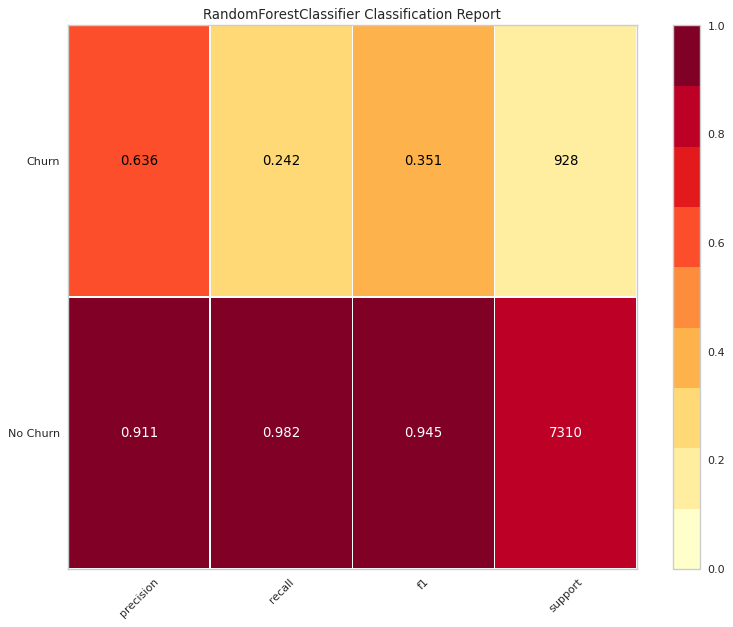

In [32]:
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassificationReport

fig = plt.figure(figsize=(10,8), dpi=80)
classes = ["No Churn", "Churn"]
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()        

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


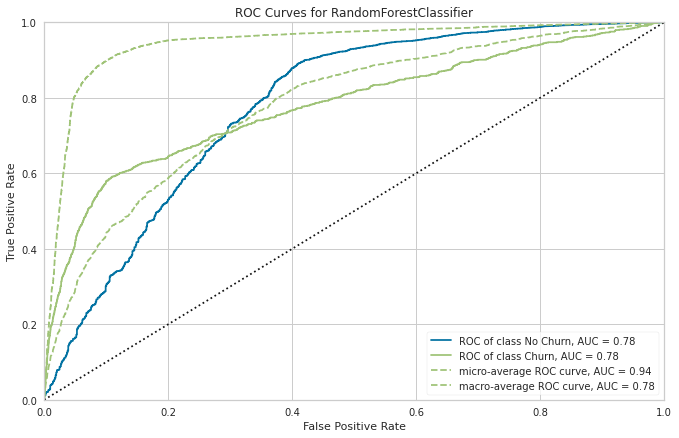

In [33]:
from yellowbrick.classifier import ROCAUC
classes = ["No Churn", "Churn"]
# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model, classes=classes,size=(800,500))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data